In [2]:
import pandas as pd

df = pd.read_csv('businesses.csv')

In [3]:
import folium
from folium.plugins import HeatMap


df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)



heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
heatmap =  folium.Map(location=[42.333943, -71.130000],zoom_start = 13)

HeatMap(heat_data).add_to(heatmap)
heatmap

In [4]:
df = df.replace({'NAICS_2017_2digit_desc':'62'},'Healthcare and Social Assistance') # Fixed labeling
df.head()

...1   latitude  longitude               business_name     street_address  \
0     1  42.349398 -71.154065     zisis convenience store  375 Washington St   
1     2  42.350387 -71.165135                     ziggy's  583 Washington St   
2     3  42.349219 -71.151769  zen zone acupuncture & spa  319 Washington St   
3     4  42.349465 -71.153117         yes nails & spa inc      416 Market St   
4     5  42.349453 -71.151543                     xfinity         12 Wirt St   

    zip  NAICS_2017_6digit_code  \
0  2135                  452319   
1  2135                       0   
2  2135                  621399   
3  2135                  812113   
4  2135                  515210   

                              NAICS_2017_6digit_desc  NAICS_2017_2digit_code  \
0               All Other General Merchandise Stores                      45   
1                                                NaN                      99   
2  Offices of All Other Miscellaneous Health Prac...                      62   
3                                        Nail Salons                      81   
4           Cable and Other Subscription Programming                      51   

             NAICS_2017_2digit_desc  estimated_employment employment_buckets  \
0                      Retail Trade                   1.0             1 to 9   
1                         Undefined                   0.0      Not Available   
2  Healthcare and Social Assistance                   2.0             1 to 9   
3                    Other Services                   3.0             1 to 9   
4                       Information                  13.0           10 to 24   

  mainstreet  
0   Brighton  
1   Brighton  
2   Brighton  
3   Brighton  
4   Brighton

<AxesSubplot:>

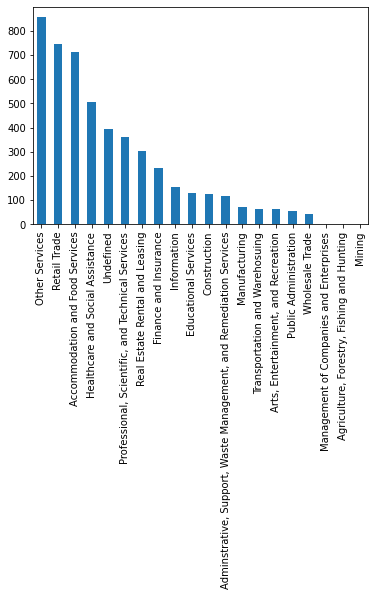

In [5]:
df["NAICS_2017_2digit_desc"].value_counts().plot(kind="bar")

# For all districts!

In [6]:
from sklearn import cluster
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

rawClusterMap =  folium.Map(location=[42.333943, -71.130000],zoom_start = 13)
x = np.arange(20)
ys = [i + x + (i*x)**2 for i in range(20)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


df["NAICS_2017_2digit_desc"] = df["NAICS_2017_2digit_desc"].astype('category')
df["Business_Type"] = df["NAICS_2017_2digit_desc"].cat.codes
df["Business_Type"].head()

for lat,lng,clusters in zip(df['latitude'], df['longitude'],  df['Business_Type']):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        
        color=rainbow[clusters-1],
        fill=True,
        fill_color=rainbow[clusters-1],
        fill_opacity=0.9).add_to(rawClusterMap)

rawClusterMap
# For all districts!

In [7]:
import geojson
from shapely.geometry import shape, Point
with open("City_Council_Districts_View.geojson") as f:
    gj = geojson.load(f)


feature = gj['features'][6]
district4 = shape(feature['geometry'])

districtMap = folium.Map(location=[42.333943, -71.130000],zoom_start = 13)
folium.GeoJson(data=district4).add_to(districtMap)
df4 = df.copy()


district4 = shape(gj['features'][6]['geometry'])
# Filtering data set for district 4 businesses only
df4 = df[df.apply(lambda x: Point(x.longitude,x.latitude).within(district4), axis=1)]

df4.head()


...1   latitude  longitude                      business_name  \
2667  2668  42.311327 -71.080831                      wingz + tingz   
2670  2671  42.305682 -71.081282             washington columbia li   
2671  2672  42.305682 -71.081282  washington columbia ii apartments   
2672  2673  42.305404 -71.081098             washington columbia ii   
2674  2675  42.307953 -71.083183                       vip wireless   

         street_address   zip  NAICS_2017_6digit_code  \
2667  388 Blue Hill Ave  2121                  722511   
2670   95 Washington St  2121                  531210   
2671   95 Washington St  2121                       0   
2672    102 Columbia Rd  2121                       0   
2674  482 Blue Hill Ave  2121                  517312   

                                 NAICS_2017_6digit_desc  \
2667                           Full-Service Restaurants   
2670          Offices of Real Estate Agents and Brokers   
2671                                                NaN   
2672                                                NaN   
2674  Wireless Telecommunications Carriers (except S...   

      NAICS_2017_2digit_code           NAICS_2017_2digit_desc  \
2667                      72  Accommodation and Food Services   
2670                      53   Real Estate Rental and Leasing   
2671                      99                        Undefined   
2672                      99                        Undefined   
2674                      51                      Information   

      estimated_employment employment_buckets  mainstreet  Business_Type  
2667                   5.0             1 to 9  Grove Hall              0  
2670                   3.0             1 to 9  Grove Hall             15  
2671                   5.0             1 to 9  Grove Hall             18  
2672                   0.0      Not Available  Grove Hall             18  
2674                   2.0             1 to 9  Grove Hall              8

<AxesSubplot:>

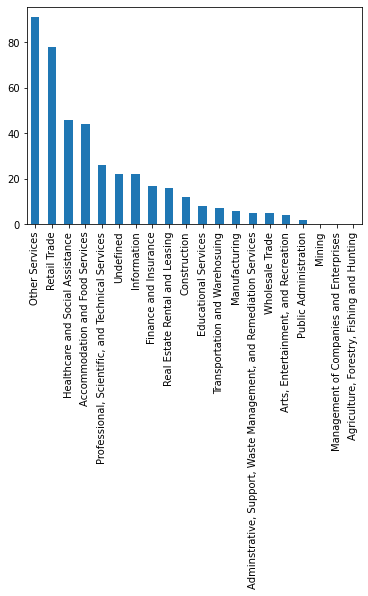

In [8]:
df4["NAICS_2017_2digit_desc"].value_counts().plot(kind="bar")

#District 4 businesses freq bar chart

In [9]:
clusterD4Map =  folium.Map(location=[42.305682,-71.081282],zoom_start = 14)
x = np.arange(20)
ys = [i + x + (i*x)**2 for i in range(20)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



for lat,lng,clusters in zip(df4['latitude'], df4['longitude'],  df4['Business_Type']):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        
        color=rainbow[clusters-1],
        fill=True,
        fill_color=rainbow[clusters-1],
        fill_opacity=0.9).add_to(clusterD4Map)


#Map for only district 4 businesses
clusterD4Map

From the perliminary data analysis, we can see that district 4 contains a variety of different small business types. The bar graph visual below shows the distribution of the quantity of each business type as defined by the BDPA data set. Specifically, if we move past the “Other services” category and look at “Retail Trade”, we observed that this category is by far the most dominant business type within district 4. Furthermore, while not as dominant, we also observed the the “Health Care and Social Assistance” and the “Accommodation and Food Services” categories represent a proportionally large share of the total number of small businesses. The remaining businesses consist of varying categories that share a proportionally small, yet somewhat equal share, which suggests that district 4 has a diverse range of more niche small business in addition to the dominant business types mentioned above.

In addition to the bar graph, the map below shows a geographical distribution of the businesses along a color to coordinate the type of the business. We will draw attention to the two most dominant categories, “Retail Trade” and “Healthcare and Social Assistance”, which are colored as orange and light blue respectively. One observation that we found to be particularly interesting is that despite being the two most common types of businesses, for the most part there aren’t dense clusters of either business category. Rather that we observed a nice distribution of the two types along the populated streets.


With regard to the original proposal, we haven’t run into any problems that would require modifying the original proposal.

Limitations:

1. As we can see there is a high number of businesses whose category is undefined. This may be a issue later on as those businesses may be dropped from the dataset. 

2. We are currently limited to small businesses that are present on only the main roads.

Potential Risks:

1. If we are to use the the 6 digit business classifier the data might be too diluted.

Additional Notes:

1.Replaced locations with number description to the appropriate description